In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier

from scipy import stats

import statsmodels.api as sm

In [205]:
df = pd.read_csv(r'C:\Users\Thomas Pettit\Desktop\MS&E 246\regression_SBA_data.csv', low_memory = False)
#df = df.drop(["TermInMonths", "subpgmdesc_Sec. 504 - Loan Guarantees - Private Sector Financed"], axis = 1)
df = df.drop("TermInMonths", axis = 1)
#drop_cols = ["BorrCity", "CDC_City", "BorrState", "CDC_State"]
#df = df.drop(labels = drop_cols, axis = 1)

In [206]:
#Split test and train data 
X = df.loc[:, df.columns != 'LoanStatus']
y = df.loc[:, df.columns == 'LoanStatus']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [207]:
x_train.columns

Index(['LoanTotal_Norm', 'State_UR', 'TermMultofYear', 'BorrCDCState_Same',
       'ProjBorrState_Same', 'S&P_Return', 'RepeatBorr',
       'BusinessType_CORPORATION',
       'subpgmdesc_Sec. 504 - Loan Guarantees - Private Sector Financed'],
      dtype='object')

In [208]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train, y_train.values.ravel())
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

In [209]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stas.chi2.sf(chisq, df)

In [210]:
model = sm.Logit(y_train, x_train)
result = model.fit()
results_summary = result.summary()

Optimization terminated successfully.
         Current function value: 0.409758
         Iterations 6


In [211]:
results_html = results_summary.tables[1].as_html()
table = pd.read_html(results_html, header = 0, index_col = 0)[0]

In [212]:
table.index = list(X.columns)
print(table.head(20))

                                                      coef  std err       z  \
LoanTotal_Norm                                      0.5173    0.014  37.689   
State_UR                                           -0.1649    0.010 -16.021   
TermMultofYear                                     -0.3833    0.162  -2.364   
BorrCDCState_Same                                  -0.6595    0.056 -11.792   
ProjBorrState_Same                                  0.2506    0.165   1.523   
S&P_Return                                         -0.0206    0.001 -25.663   
RepeatBorr                                         -0.1426    0.054  -2.637   
BusinessType_CORPORATION                            0.0511    0.041   1.243   
subpgmdesc_Sec. 504 - Loan Guarantees - Private...  0.0368    0.050   0.739   

                                                    P>|z|  [0.025  0.975]  
LoanTotal_Norm                                      0.000   0.490   0.544  
State_UR                                            0.000

In [213]:
#train and test accuracy

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

sum_train = 0
for i in range(len(y_train)):
    if (train_preds[i] == y_train[i]):
        sum_train += 1

sum_test = 0
for i in range(len(y_test)):
    if (test_preds[i] == y_test[i]):
        sum_test += 1

train_actual = sum_train/len(y_train)
test_actual = sum_test/len(y_test)

print("Training Accuracy is: ", train_actual)
print("Testing Accuracy is: ", test_actual)

Training Accuracy is:  0.8365915962881868
Testing Accuracy is:  0.8355431212747841


In [214]:
conf_mat = confusion_matrix(y_test, test_preds)
print(conf_mat)

[[13559   188]
 [ 2516   179]]


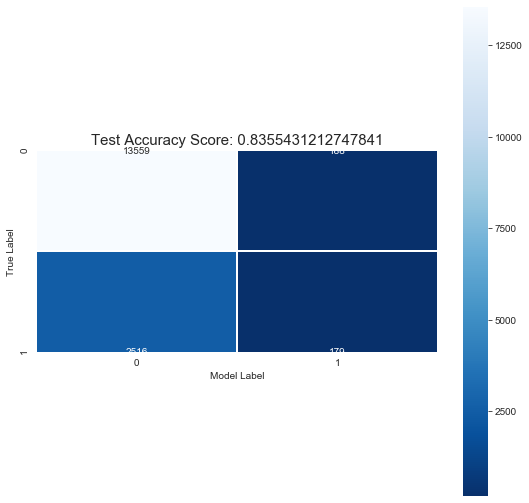

In [215]:
# Construct Plots
plt.figure(figsize = (9, 9))
sns.heatmap(conf_mat, annot = True, fmt = ".0f", linewidth = .5, square = True, cmap = 'Blues_r')
plt.ylabel("True Label")
plt.xlabel("Model Label")
full_sample_tit = "LR Test Accuracy: {0}".format(test_actual)
plt.title(full_sample_tit, size = 15)
plt.show()

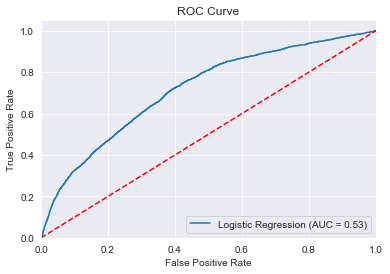

In [216]:
logit_roc_auc = roc_auc_score(y_test, test_preds)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = "Logistic Regression (AUC = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LR")
plt.legend(loc = "lower right")
plt.show()

In [217]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     13747
         1.0       0.49      0.07      0.12      2695

    accuracy                           0.84     16442
   macro avg       0.67      0.53      0.51     16442
weighted avg       0.79      0.84      0.78     16442



In [257]:
#Feature Importance
cols = x_train.columns
feat_import = lr.coef_[0]
col_names = cols
order = np.argsort(feat_import)[::-1]
feat_import = feat_import[order]
col_names = col_names[order]

for i in range(len(feat_import)):
    print("Feature ", col_names[i], "has an importance of: ",
         feat_import[i])

Feature  ProjBorrState_Same has an importance of:  0.7720802645624978
Feature  LoanTotal_Norm has an importance of:  0.5154885378674937
Feature  TermMultofYear has an importance of:  0.3512346123223429
Feature  BusinessType_CORPORATION has an importance of:  0.0677622904947172
Feature  subpgmdesc_Sec. 504 - Loan Guarantees - Private Sector Financed has an importance of:  0.06295318376060417
Feature  S&P_Return has an importance of:  -0.020494121570342846
Feature  RepeatBorr has an importance of:  -0.13989212277391058
Feature  State_UR has an importance of:  -0.15842122804720188
Feature  BorrCDCState_Same has an importance of:  -0.6511983373627231


In [247]:
#Random Forrest Algo

rf = RandomForestClassifier(1000, n_jobs = -1, max_depth = 10)
rf.fit(x_train, y_train.ravel())
train_preds_rf = rf.predict(x_train)
test_preds_rf = rf.predict(x_test)

In [248]:
sum_train = 0
for i in range(len(y_train)):
    if (train_preds_rf[i] == y_train[i]):
        sum_train += 1

sum_test = 0
for i in range(len(y_test)):
    if (test_preds_rf[i] == y_test[i]):
        sum_test += 1

train_actual_rf = sum_train/len(y_train)
test_actual_rf = sum_test/len(y_test)

print("Training Accuracy is: ", train_actual_rf)
print("Testing Accuracy is: ", test_actual_rf)

Training Accuracy is:  0.8689656970076113
Testing Accuracy is:  0.8517820216518671


In [258]:
feat_import = rf.feature_importances_
col_names = cols
order = np.argsort(feat_import)[::-1]
feat_import = feat_import[order]
col_names = col_names[order]

for i in range(len(feat_import)):
    print("Feature ",col_names[i], "has an importance of: ", feat_import[i])

Feature  S&P_Return has an importance of:  0.4206462194527722
Feature  LoanTotal_Norm has an importance of:  0.36642600352179994
Feature  State_UR has an importance of:  0.16035784147732904
Feature  BorrCDCState_Same has an importance of:  0.016641015687809273
Feature  subpgmdesc_Sec. 504 - Loan Guarantees - Private Sector Financed has an importance of:  0.011896546843226843
Feature  BusinessType_CORPORATION has an importance of:  0.010777761335457653
Feature  RepeatBorr has an importance of:  0.010086954659557773
Feature  ProjBorrState_Same has an importance of:  0.0021762783171660562
Feature  TermMultofYear has an importance of:  0.000991378704881165


In [228]:
conf_mat_rf = confusion_matrix(y_test, test_preds_rf) 
print(conf_mat_rf)

[[13412   335]
 [ 2107   588]]


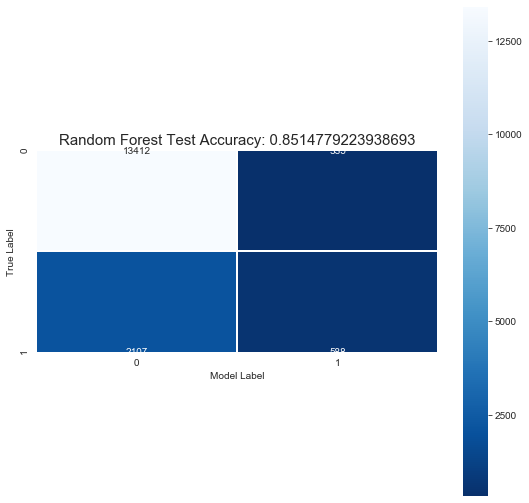

In [229]:
# Construct Plots
plt.figure(figsize = (9, 9))
sns.heatmap(conf_mat_rf, annot = True, fmt = ".0f", linewidth = .5, square = True, cmap = 'Blues_r')
plt.ylabel("True Label")
plt.xlabel("Model Label")
full_sample_tit = "Random Forest Test Accuracy: {0}".format(test_actual_rf)
plt.title(full_sample_tit, size = 15)
plt.show()

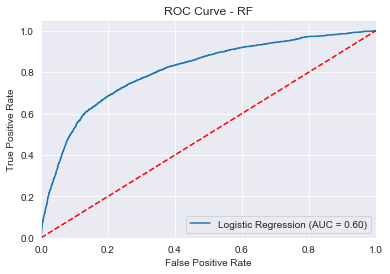

In [232]:
rf_roc_auc = roc_auc_score(y_test, test_preds_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = "Logistic Regression (AUC = %0.2f)" % rf_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RF")
plt.legend(loc = "lower right")
plt.show()

In [244]:
#Neural Net Algo
import keras 
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: SystemError: <built-in method __contains__ of dict object at 0x000001F5E332EBD8> returned a result with an error set

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

In [243]:
model = Sequential()
dims = x_train.shape[1]

model.add(BatchNormalization)

model.add(Dense(32, input_dims = dims))
model.add(BatchNormalization())

model.add(Dense(64, activation = "relu"))
model.add(BatchNormalization())

model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation = "relu"))
model.add(BatchNormalization())

model.add(Dense(1, activation = "sigmoid"))

NameError: name 'Sequential' is not defined

In [ ]:
epochs = 40 
b_size = 256

es = EarlyStopping(monitor = "val_loss", mode = "min")
optim = Adam(lr = 0.001)
model.compile(optimizer = optim, metrics = ["accuracy"],
              loss = "binary_crossentropy")

model.fit(x_train, y_train, batch_size = b_size, epochs = epochs, validation_data = (x_val, y_val))

In [ ]:
train_preds_nn = model.predict(x_train)
train_preds_nn = model.predict(x_test)
train_preds_nn = (train_preds_nn > 0.5).astype(int).flatten()
test_preds_nn = (test_preds_nn > 0.5).astype(int).flatten()